# Clustering Exploration

In [222]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import SpectralClustering
from sklearn.metrics import accuracy_score

## KMeans

In [233]:
%run kmeans

### Simple Example With Two Distinct Clusters
* Vanilla kmeans works by randomly initializing a specified (k) number of centroids and then 
    <ol>
    <li>Assigning data points to their closest centroids</li>
    <li>Recomputing the centroids as the mean of the points belonging to each cluster</li>
    <li>Repeat the process until centroids don't change by some specified tolerance</li>
    </ol>
* Here we show that regular kmeans is able to find the centers of two synthetically created clusters and assign points correctly

<font size=3> Create two clusters normally distributed about (0,0) and (4,4) respectively in two dimensions </font>

In [3]:
group1 = np.random.normal(loc=[0,0], scale=[1,1], size=(100,2))
group2 = np.random.normal(loc=[4,4], scale=[1,1], size=(100,2))

In [4]:
X = np.vstack([group1,group2])

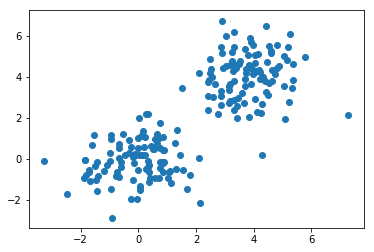

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.show()

<font size=3> The results of our kmeans algorithm (setting number of clusters=2) shows that it easily finds the centers of each group</font>

In [6]:
centroids, cluster_indexes = kmeans(X, k=2)

Reached iteration 1, change in centroid distance: 3.3505724442162523
Reached iteration 2, change in centroid distance: 1.4273449005389718
Reached iteration 3, change in centroid distance: 0.17641866464256745
Reached iteration 4, change in centroid distance: 0.0


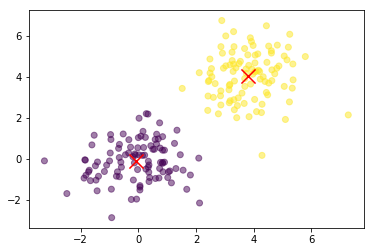

In [7]:
ax1 = plt.scatter(X[:,0], X[:,1], alpha=0.5, c=cluster_indexes)
ax2 = plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='r', linewidths=8)
plt.show()

### Confusing KMeans
* What if the clusters have different variances, or the wrong initialization centroids are chosen? Here we show that it can often produce different results with each iteration of running kmeans

In [8]:
group1 = np.random.normal(loc=[0,0], scale=[0.1,0.1], size=(100,2))
group2 = np.random.normal(loc=[0,2], scale=[0.5,0.5], size=(100,2))
group3 = np.random.normal(loc=(3,3), scale=[1,1], size=(200,2))

In [9]:
X = np.vstack([group1,group2,group3])

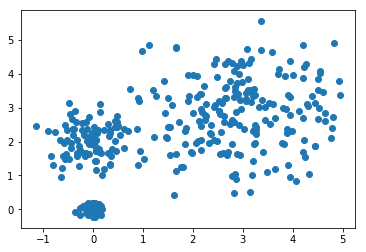

In [10]:
plt.scatter(X[:,0],X[:,1])
plt.show()

<font size=3>The above plot was created with three distinct clusters, some with higher variance. We see that depending on the random initialization of our clusters, kmeans can produce very different results, as shown in the two plots below</font>

In [11]:
centroids_run1, cluster_indexes_run1 = kmeans(X, k=3)
#cluster_colors_run1 = cluster_colors(cluster_indexes_run1)

Reached iteration 1, change in centroid distance: 1.8643889864293264
Reached iteration 2, change in centroid distance: 0.3524654143926682
Reached iteration 3, change in centroid distance: 0.11720397544645224
Reached iteration 4, change in centroid distance: 0.029681353220982195
Reached iteration 5, change in centroid distance: 0.029759121303777496
Reached iteration 6, change in centroid distance: 0.01197546552897972
Reached iteration 7, change in centroid distance: 0.0


In [22]:
centroids_run2, cluster_indexes_run2 = kmeans(X, k=3)
#cluster_colors_run2 = cluster_colors(cluster_indexes_run2)

Reached iteration 1, change in centroid distance: 1.4914543193119743
Reached iteration 2, change in centroid distance: 0.4235311048427985
Reached iteration 3, change in centroid distance: 0.20370290906325345
Reached iteration 4, change in centroid distance: 0.07409020674570002
Reached iteration 5, change in centroid distance: 0.07506223357832714
Reached iteration 6, change in centroid distance: 0.031397399118610024
Reached iteration 7, change in centroid distance: 0.0


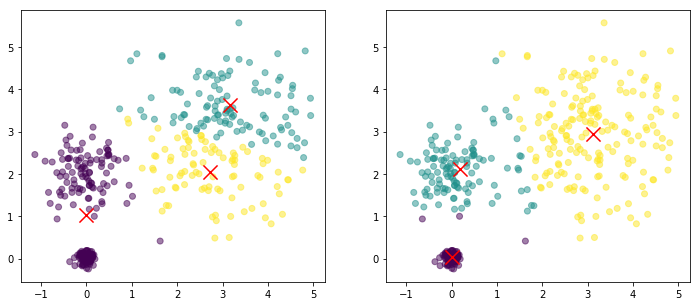

In [23]:
plt.figure(figsize=(12,5))
ax1 = plt.subplot(121)
ax1.scatter(X[:,0], X[:,1], alpha=0.5, c=cluster_indexes_run1)
ax1.scatter(centroids_run1[:,0], centroids_run1[:,1], marker='x', s=200, c='r', linewidths=8)

ax2 = plt.subplot(122)
ax2.scatter(X[:,0], X[:,1], alpha=0.5, c=cluster_indexes_run2)
ax2.scatter(centroids_run2[:,0], centroids_run2[:,1], marker='x', s=200, c='r', linewidths=8)

plt.show()

### Fixing Intialization Issues with KMeans ++
* KMeans++ is an improved version of KMeans that address initialization issues by finding "smart" initial centroids before proceeding with the regular KMeans algorithm
* The first centroid is still chosen randomly, but every subsequent inital centroid (the remaining k-1 choices) is picked as the data point whose minimum distance to the existing centroids is maximized

In [27]:
kmeans_output, initial_centroids = kmeans_plus_plus(X, k=3)

Reached iteration 1, change in centroid distance: 0.7330861908899363
Reached iteration 2, change in centroid distance: 0.43246590512059496
Reached iteration 3, change in centroid distance: 0.12390889612354952
Reached iteration 4, change in centroid distance: 0.04971838473547824
Reached iteration 5, change in centroid distance: 0.05548387996103093
Reached iteration 6, change in centroid distance: 0.06834049993756969
Reached iteration 7, change in centroid distance: 0.01694963731798282
Reached iteration 8, change in centroid distance: 0.0


In [28]:
centroids, cluster_indexes = kmeans_output

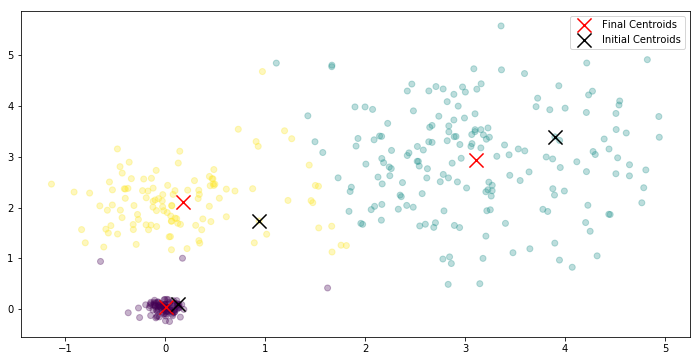

In [29]:
plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], alpha=0.3, c=cluster_indexes, label="_nolegend_")
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='red', linewidths=8)
plt.scatter(initial_centroids[:,0], initial_centroids[:,1], marker='x', s=200, c='black', linewidths=8)
plt.legend(['Final Centroids','Initial Centroids'])
plt.show()

### Image Compression
* Thinking about each pixel in an image as a data point (1-D vector for greyscale, 3-D vector for RGB) we can use kmeans to to reduce the possible values taken on by pixels to just those defined by k centroids (a form of image compression)

#### Greyscale Image

In [30]:
dog_original = Image.open('dog.png')

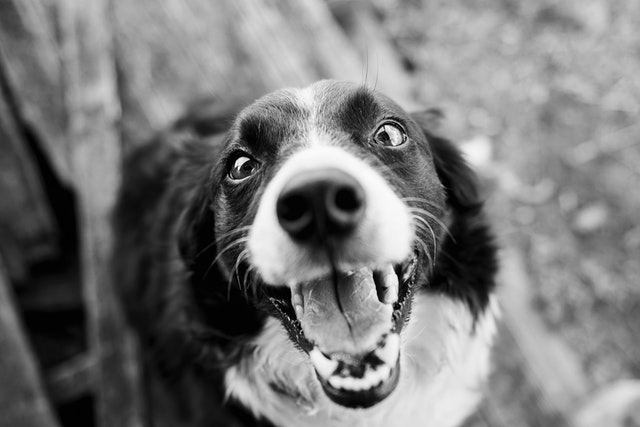

In [31]:
dog_original

In [32]:
h,w = dog_original.height, dog_original.width

<font size=3>Greyscale images only have one dimension so we convert our image into a single column array</font>

In [33]:
X = np.array(dog_original).reshape(-1,1)

<font size=3>We are going to find four clusters in our image, thereby reduce our greyscale image from representation in 0-255 space, to only four values!</font>

In [34]:
output, initial_centroids = kmeans_plus_plus(X, k=4)
centroids, cluster_indexes = output

Reached iteration 1, change in centroid distance: 126.35849992914612
Reached iteration 2, change in centroid distance: 76.56488118466402
Reached iteration 3, change in centroid distance: 25.711760989330614
Reached iteration 4, change in centroid distance: 11.931228700605322
Reached iteration 5, change in centroid distance: 7.4442507387158265
Reached iteration 6, change in centroid distance: 4.455448127880959
Reached iteration 7, change in centroid distance: 2.392603918568763
Reached iteration 8, change in centroid distance: 1.9527459716215032
Reached iteration 9, change in centroid distance: 0.9460189484866245
Reached iteration 10, change in centroid distance: 0.0


<font size=3>Centroids can become floating point representations, but images require integer values</font>

In [35]:
centroids = centroids.astype(np.uint8)

In [36]:
centroids

array([[ 89],
       [ 26],
       [150],
       [199]], dtype=uint8)

<font size=3>Map every element of X to the centroid value of the cluster it belongs to</font>

In [37]:
centroid_map = {i:centroid for i,centroid in enumerate(centroids)}

In [38]:
new_X = np.array([centroid_map[cluster_index] for cluster_index in cluster_indexes])
new_X = new_X.reshape((h,w))
dog_new = Image.fromarray(new_X, 'L')

<font size=3>The result? Art! </font>

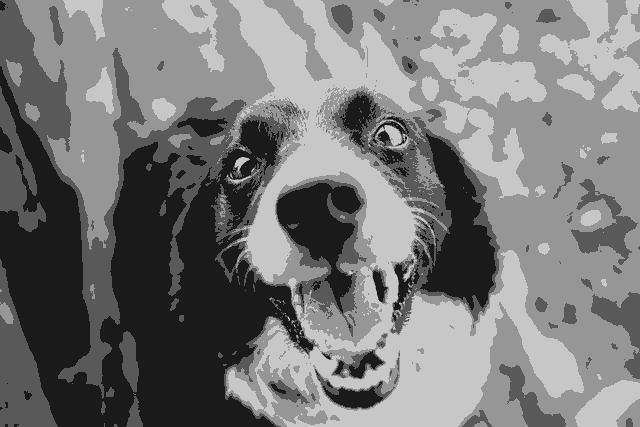

In [39]:
dog_new

#### Color Image (Painting)

In [40]:
vangogh = Image.open('starry_night.jpg')

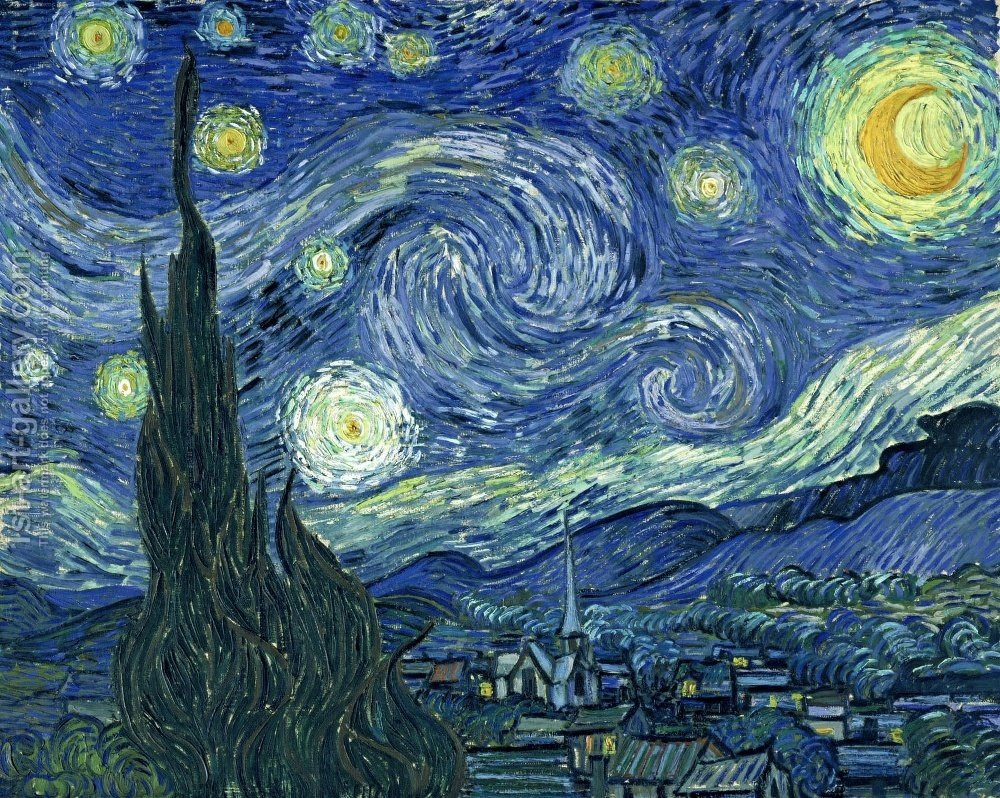

In [42]:
vangogh

In [43]:
h,w = vangogh.height, vangogh.width

In [44]:
X = np.array(vangogh).reshape(-1,3)

In [51]:
output, initial_centroids = kmeans_plus_plus(X, k=5, tolerance=2)

Reached iteration 1, change in centroid distance: 134.5048355985506
Reached iteration 2, change in centroid distance: 111.24990407662187
Reached iteration 3, change in centroid distance: 33.738943776276976
Reached iteration 4, change in centroid distance: 18.790316654301314
Reached iteration 5, change in centroid distance: 13.767596333156334
Reached iteration 6, change in centroid distance: 12.097711540874533
Reached iteration 7, change in centroid distance: 12.855906927336271
Reached iteration 8, change in centroid distance: 13.901831795354852
Reached iteration 9, change in centroid distance: 11.237143899210164
Reached iteration 10, change in centroid distance: 7.404728277490192
Reached iteration 11, change in centroid distance: 4.649597291040328
Reached iteration 12, change in centroid distance: 3.089866683552309
Reached iteration 13, change in centroid distance: 2.0610401360143897
Reached iteration 14, change in centroid distance: 1.5414807913753985


In [52]:
centroids, cluster_indexes = output

In [53]:
centroids = centroids.astype(np.uint8)

In [54]:
centroid_map = {i:centroid for i,centroid in enumerate(centroids)}

In [55]:
new_X = np.array([centroid_map[cluster_index] for cluster_index in cluster_indexes])
new_X = new_X.reshape((h,w,3))
vangogh_new = Image.fromarray(new_X)

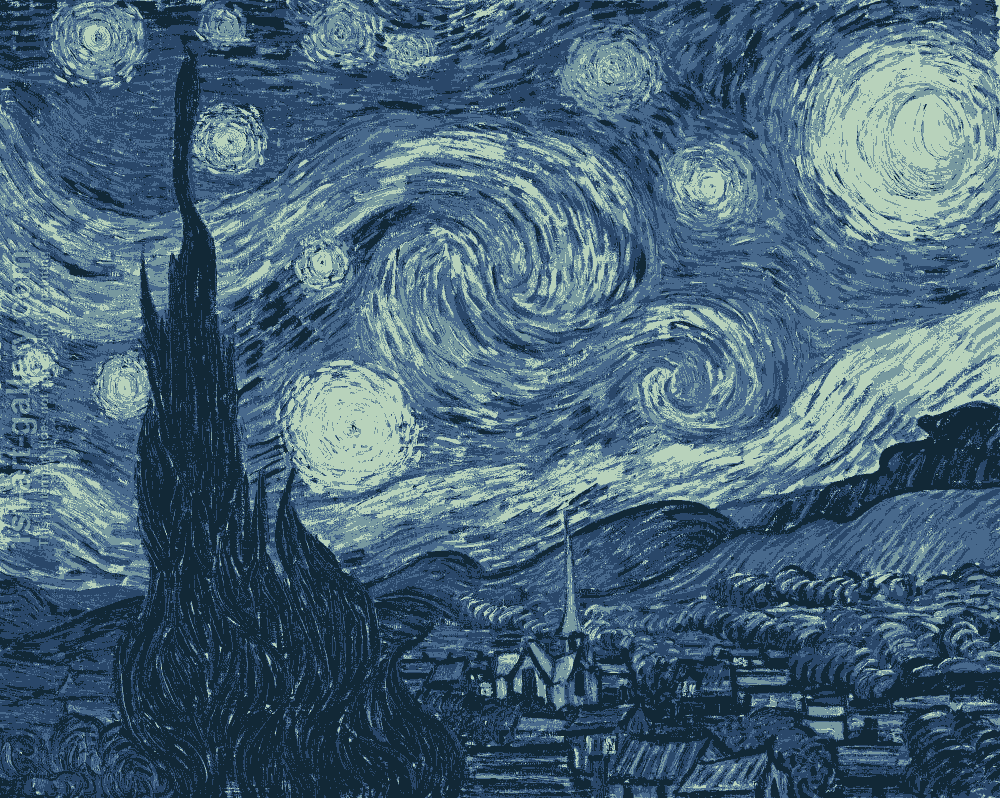

In [56]:
vangogh_new

#### Color Image (Photo)

In [57]:
landscape = Image.open('landscape.jpg')

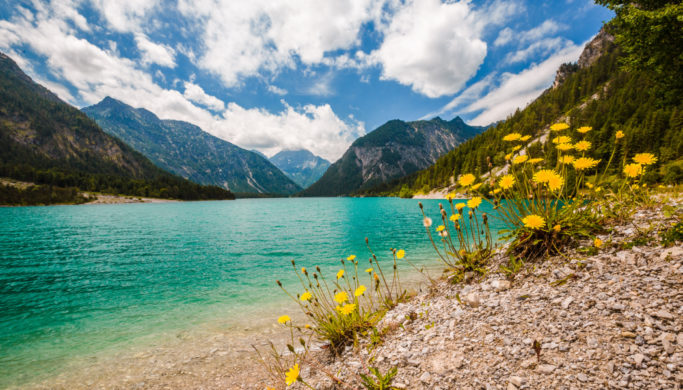

In [58]:
landscape

In [59]:
h,w = landscape.height, landscape.width

In [60]:
X = np.array(landscape).reshape(-1,3)

In [67]:
output, initial_centroids = kmeans_plus_plus(X, k=8, tolerance=5)

Reached iteration 1, change in centroid distance: 319.1482674094971
Reached iteration 2, change in centroid distance: 192.89972690893404
Reached iteration 3, change in centroid distance: 48.682545639459505
Reached iteration 4, change in centroid distance: 23.507642332026847
Reached iteration 5, change in centroid distance: 16.716557977556675
Reached iteration 6, change in centroid distance: 19.44171413221326
Reached iteration 7, change in centroid distance: 13.27593915150877
Reached iteration 8, change in centroid distance: 7.035858784600635
Reached iteration 9, change in centroid distance: 3.921299643737343


In [68]:
centroids, cluster_indexes = output

In [69]:
centroids = centroids.astype(np.uint8)

In [70]:
centroid_map = {i:centroid for i,centroid in enumerate(centroids)}

In [71]:
new_X = np.array([centroid_map[cluster_index] for cluster_index in cluster_indexes])
new_X = new_X.reshape((h,w,3))
landscape_new = Image.fromarray(new_X)

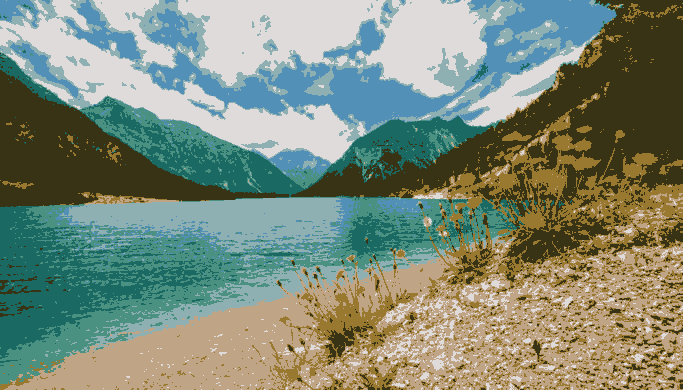

In [72]:
landscape_new

## Spectral Clustering
* Goal: train a random forest on an unlabeled version of a breast-cancer dataset. Use the results to to compute a similarity/proximity matrix between data points that can then be fed into a spectral clustering algorithm. Compare the k=2 cluster results to the actual labels (Malignant or Benign)

In [284]:
cancer_data = pd.read_csv('cancer_data.csv')
cancer_data['label'] = cancer_data['diagnosis'].map({'M':1, 'B':0})

<font size=3>Since this is an unsupervised problem, we don't have labels. We train our random forest then is by creating a duplicate dataset where each column has been shuffled. We concatenate these two datasets and task the random forest to predict label = original or shuffled dataset</font>

In [271]:
original = cancer_data.drop(columns=['id','diagnosis','Unnamed: 32','label'])
shuffled = original.copy()

In [272]:
for col in shuffled.columns:
    np.random.shuffle(shuffled[col].values)

In [273]:
original['target'] = 1
shuffled['target'] = 2
combined_data = pd.concat([original, shuffled], axis=0)

In [279]:
X = combined_data.drop(columns=['target'])
y = combined_data['target']
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=3, max_features=0.8)
rf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<font size=3>leaf_samples is a function that returns which data points of our original dataset end up in which leaf node (repeated for every tree in the random forest)</font>

In [280]:
leafs = leaf_samples(rf, original.drop(columns=['target']))

<font size=3>Constructing the similarity matrix is then just a matter of incrementing the i,j entries in the matrix if they ever appeared in a leaf node together</font>

In [281]:
similarity_matrix = np.zeros((len(original), len(original)))

for arr in leafs:
    for i in range(len(arr)):
        for j in range(len(arr)):
            similarity_matrix[arr[i], arr[j]] +=1

In [282]:
cluster = SpectralClustering(n_clusters=2, affinity='precomputed')
cluster_preds = cluster.fit_predict(similarity_matrix)

<font size=3>Creating two clusters (correspoding hopefully to Malignant and Benign) via Spectral Clustering turns out to actually achieve <b>90%</b> accuracy when compared with the true labels</font>

In [285]:
accuracy_score(cancer_data['label'], cluster_preds)

0.9033391915641477

In [286]:
confusion_matrix(cancer_data['label'], cluster_preds)

array([[319,  38],
       [ 17, 195]])

<font size=3>We can also see how our regular kmeans does at creating two clusters corresponding to our true lables. Accuracy is less than spectral clustering, but still achieves <b>85%</b></font>

In [287]:
original_array = np.array(original.drop(columns=['target']))
centroids, cluster_indexes = kmeans(original_array, k=2)

Reached iteration 1, change in centroid distance: 885.6527546785173
Reached iteration 2, change in centroid distance: 485.8151775277754
Reached iteration 3, change in centroid distance: 232.57212063478596
Reached iteration 4, change in centroid distance: 103.22396761353083
Reached iteration 5, change in centroid distance: 53.867039483219166
Reached iteration 6, change in centroid distance: 33.97836002054128
Reached iteration 7, change in centroid distance: 21.90542123279184
Reached iteration 8, change in centroid distance: 10.76452976693183
Reached iteration 9, change in centroid distance: 5.388804859613899
Reached iteration 10, change in centroid distance: 0.0


In [288]:
accuracy_score(cancer_data['label'], cluster_indexes)

0.8541300527240774